In [1]:
import dapt.benchmarks as benchmarks
from dapt.nuclear_data import Covariances
import pandas as pd
import numpy as np

In [2]:
sens_path = r"C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-001\hmf001.i.serp_sens0.m"
res_path = r"C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-001\hmf001.i.serp_res.m"

hmf1 = benchmarks.Benchmark(sens_path, res_path)

sens_path = r"C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-002\hmf002-001.i.serp_sens0.m"
res_path = r"C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-002\hmf002-001.i.serp_res.m"

hmf2 = benchmarks.Benchmark(sens_path, res_path)

SERPENT Serpent 2.2.1 found in C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-001\hmf001.i.serp_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.
SERPENT Serpent 2.2.1 found in C:\Users\dhouben\Documents\Benchmarks\HEU\HMF-002\hmf002-001.i.serp_res.m, but version 2.1.31 is defined in settings
  Attemping to read anyway. Please report strange behaviors/failures to developers.


In [3]:
hmf1.print_summary()

Title: hmf001
 Bias=0.00063 +/- 0.00103


In [4]:
ZAIs = hmf1.S.index.get_level_values('ZAI').unique()

In [5]:
covariances = {zai: Covariances.from_hdf5(r"C:\Users\dhouben\Documents\DAPT\notebooks\nuclear_data\jeff_33\jeff_33.h5", zai).fillna(0) for zai in ZAIs}

No covariance data found for 70140, returning empty df


In [6]:
bmarks = benchmarks.BenchmarkSuite([hmf1, hmf2])

In [7]:
bmarks.K_prior['K_prior'] - bmarks.K_exp['K_exp']

hmf001        0.00063
hmf002-001    0.00352
dtype: float64

In [8]:
bmarks.S.loc[922350]

hmf001  hmf002-001
MT    E_min_eV     E_max_eV                          
2     1.000000e-05 1.000000e-04  0.000000    0.000000
      1.000000e-04 5.000000e-04  0.000000    0.000000
      5.000000e-04 7.500000e-04  0.000000    0.000000
      7.500000e-04 1.000000e-03  0.000000    0.000000
      1.000000e-03 1.200000e-03  0.000000    0.000000
...                                   ...         ...
35018 1.284000e+07 1.384000e+07  0.000158    0.000106
      1.384000e+07 1.455000e+07  0.000035    0.000052
      1.455000e+07 1.568300e+07  0.000060    0.000020
      1.568300e+07 1.733300e+07  0.000020    0.000023
      1.733300e+07 2.000000e+07 -0.000016    0.000006

[1428 rows x 2 columns]

In [9]:
covariances[70140] = pd.DataFrame(0, index=covariances[922380].index, columns=covariances[922380].columns)

In [10]:
bmarks.calculate_V_prior(covariances)

In [11]:
bmarks.S

hmf001  hmf002-001
ZAI    MT    E_min_eV     E_max_eV                              
70140  2     1.000000e-05 1.000000e-04  0.000000e+00    0.000000
             1.000000e-04 5.000000e-04  0.000000e+00    0.000000
             5.000000e-04 7.500000e-04  0.000000e+00    0.000000
             7.500000e-04 1.000000e-03  0.000000e+00    0.000000
             1.000000e-03 1.200000e-03  0.000000e+00    0.000000
...                                              ...         ...
922380 35018 1.284000e+07 1.384000e+07  1.286010e-06    0.000017
             1.384000e+07 1.455000e+07  7.700210e-07    0.000000
             1.455000e+07 1.568300e+07  0.000000e+00    0.000005
             1.568300e+07 1.733300e+07  0.000000e+00    0.000003
             1.733300e+07 2.000000e+07  1.804120e-06    0.000004

[7140 rows x 2 columns]

In [12]:
bmarks.remove_benchmark('hmf002-001')

In [13]:
bmarks.add_benchmark(hmf2)

In [14]:
bmarks.ZAIs

Index([70140, 80160, 922340, 922350, 922380], dtype='int64', name='ZAI')

In [15]:
hmf2.print_summary()

Title: hmf002-001
 Bias=0.00352 +/- 0.00301


In [16]:
bmarks.calculate_C_inv()

,hmf001,hmf002-001
hmf001,31010.089044,-30575.884000
hmf002-001,-11316.675281,11468.155619


In [17]:
bmarks.C_inv

,hmf001,hmf002-001
hmf001,31010.089044,-30575.884000
hmf002-001,-11316.675281,11468.155619


In [18]:
res = bmarks.gls(covariances)

GLS Procedure Summary:
Prior X: 0.031
Posterior X: 0.038
Titles of Benchmarks Included: hmf001, hmf002-001
Condition Number: 224.33


In [19]:
hmf2.to_hdf5()

C:\Users\dhouben\Documents\DAPT\dapt\benchmarks.py:91: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  self.S.to_hdf(file_path, f'{self.title}/sensitivity', mode='a', format='table')


In [20]:
hmf2.title

'hmf002-001'

In [21]:
hmf001 = benchmarks.Benchmark.from_hdf5(file_path=r'C:\Users\dhouben\Documents\DAPT\benchmarks.h5', title='hmf001')

In [22]:
hmf001.S.index.get_level_values('MT').unique()

Index([2, 4, 18, 102, 456, 35018], dtype='int64', name='MT')

<Axes: xlabel='E_min_eV,E_max_eV'>

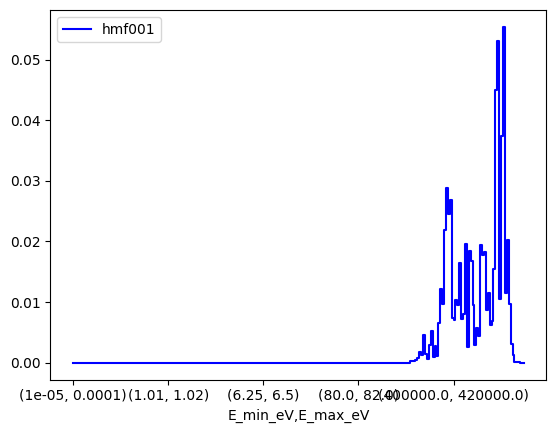

In [23]:
hmf001.S.loc[(922350, 18)].plot(drawstyle='steps-pre', color='blue')

In [30]:
import matplotlib.pyplot as plt
import sandy

In [ ]:
def lethargywidths(self):
        """Calculate lethargy widths for each energy bin."""
        energies = pd.IntervalIndex.from_arrays(
            self.index.get_level_values('E_min_eV'),
            self.index.get_level_values('E_max_eV')
        )
        return np.log(energies.right / energies.left)

In [40]:
hmf001.S

hmf001
ZAI    MT    E_min_eV    E_max_eV               
70140  2     1.00000e-05 1.00000e-04 0.00000e+00
             1.00000e-04 5.00000e-04 0.00000e+00
             5.00000e-04 7.50000e-04 0.00000e+00
             7.50000e-04 1.00000e-03 0.00000e+00
             1.00000e-03 1.20000e-03 0.00000e+00
...                                          ...
922380 35018 1.28400e+07 1.38400e+07 1.28601e-06
             1.38400e+07 1.45500e+07 7.70021e-07
             1.45500e+07 1.56830e+07 0.00000e+00
             1.56830e+07 1.73330e+07 0.00000e+00
             1.73330e+07 2.00000e+07 1.80412e-06

[7140 rows x 1 columns]

In [37]:
energies = pd.IntervalIndex.from_arrays(
            hmf001.S.index.get_level_values('E_min_eV'),
            hmf001.S.index.get_level_values('E_max_eV')
        )
lethargyWidths = np.log(energies.right / energies.left)
value = hmf001.S.iloc[:, 0] / lethargyWidths
        
unc = hmf001.S.iloc[:, 1] * abs(value)

plt.step(energies[1:] * 1E6, value, where='pre', linewidth=1, color='blue')
plt.fill_between(energies[1:] * 1E6, value-unc, value+unc, step='pre', alpha=0.15, color='blue')

IndexError: single positional indexer is out-of-bounds

In [ ]:
def plot_sensitivity(sens, zai, pert, color=None, label=None):
    if zai in sens.zais:
        ks = sens.sensitivities["keff"]
        kslice = ks[
            sens.materials["total"],  # index for sensitivity due to all materials
            sens.zais[zai],  # index for sensitivity due to U238
            sens.perts[pert],  # index for sensitivity due to fission xs
        ]
        
        value = kslice[:, 0] / sens.lethargyWidths
        
        unc = kslice[:, 1] * abs(value)
        
        plt.step(sens.energies[1:] * 1E6, value, where='pre', linewidth=1, color=color, label=f'{label} - {sandy.zam2latex(zai)} - {pert}')
        plt.fill_between(sens.energies[1:] * 1E6, value-unc, value+unc, step='pre', alpha=0.15, color=color)
    
        plt.xscale('log')
        plt.legend()
        plt.xlabel('Energy [MeV]')
        plt.ylabel('Sensitivitiy to keff per unit Lethargy')
        #plt.grid(which='both')
        plt.title('Sensitivity to keff')
        #plt.gca().xaxis.set_minor_locator(LogLocator(base=10.0, subs="auto", numticks=10))
        #plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())  # Optional: hide minor tick
        plt.grid(axis='y', which='major', linestyle='-', color='gray', linewidth=0.5)

        plt.grid(axis='x', which='major', linestyle='-', color='gray', linewidth=0.5)
        plt.grid(axis='x', which='minor', linestyle=':', color='gray', linewidth=0.5)
        
        plt.minorticks_on()
    return None

In [28]:
hmf1.S

hmf001  hmf001_std
ZAI    MT    E_min_eV    E_max_eV                           
70140  2     1.00000e-05 1.00000e-04 0.00000e+00 0.00000e+00
             1.00000e-04 5.00000e-04 0.00000e+00 0.00000e+00
             5.00000e-04 7.50000e-04 0.00000e+00 0.00000e+00
             7.50000e-04 1.00000e-03 0.00000e+00 0.00000e+00
             1.00000e-03 1.20000e-03 0.00000e+00 0.00000e+00
...                                          ...         ...
922380 35018 1.28400e+07 1.38400e+07 1.28601e-06 1.00000e+00
             1.38400e+07 1.45500e+07 7.70021e-07 1.00000e+00
             1.45500e+07 1.56830e+07 0.00000e+00 0.00000e+00
             1.56830e+07 1.73330e+07 0.00000e+00 0.00000e+00
             1.73330e+07 2.00000e+07 1.80412e-06 1.00000e+00

[7140 rows x 2 columns]

In [25]:
import sandy

In [26]:
print(sandy.zam.zam2nuclide.__doc__)


    Convert ZAM to string such with symbol and mass, such as `922350` to
    `"U235"` or `952421` to `"Am242m"`.

    Parameters
    ----------
    zam : `int`
        nuclide ZAM indicator
    atomic_number : `bool`, optional, default is `False`
        flag to include the atomic number in the nuclide name
    sep : `str`, optional, default is `''`
        separation character(s) to place between the atomic number
        (if present), the element ID, and the mass number.

    Returns
    -------
    `string`
        nuclide expressed with symbol and mass

    Examples
    --------
    >>> zam2nuclide(922350)
    'U235'

    >>> zam2nuclide(922350, atomic_number=True)
    '92U235'

    >>> zam2nuclide(922350, atomic_number=True, sep="-")
    '92-U-235'

    >>> zam2nuclide(922350, atomic_number=False, sep="-")
    'U-235'

    >>> zam2nuclide(952420)
    'Am242'

    >>> zam2nuclide(952421)
    'Am242m'

    >>> zam2nuclide(952421, atomic_number=True, sep="_")
    '95_Am_242m'

    >

In [27]:
sandy.zam.zam2nuclide(922351, atomic_number=True, sep='-').lower() + "g.jeff4t4"

'92-u-235mg.jeff4t4'